## Power analysis

In [96]:
# Import modules
import numpy as np


A power analysis is an important concept in experimental design and hypothesis testing, as it helps researchers determine the appropriate sample size needed to detect a significant effect, if it exists. Without adequate power, studies may fail to detect genuine effects, leading to inconclusive or misleading results.

In this context, pilot experiments are essential to quantify the approximate variability of a response variable. In the example below our goal is to identify how many downward-facing images we need to collect in a field to compute the percentage of green canopy cover withing a 5% with a 95% confidence. The provided values are the result of an exploratory field data collection to compute the variability of the field. The power analysis rests on the notion that:

$$ n = \Bigg( \frac{1.96 \sigma}{\delta} \Bigg)^2 $$

where $n$ is the number of samples to be collected, $\delta$ is the error marging with 95% confidence, 1.96 is the z-score, and $\sigma$ is the standard deviation (required in advance). For more insights, check the manuscript by [Patrignani and Ochsner, 2015](https://doi.org/10.2134/agronj15.0150).

In [113]:
# Values from a pilot experiment
canopy_cover = np.array([25, 16, 19, 23, 12]) # Percent


In [114]:
# Define parameters
z_score = 1.96  # z-score for a 95% confidence level
margin_of_error = 5  # Margin of error
standard_deviation = np.std(canopy_cover)

# Calculate sample size
sample_size = (z_score * standard_deviation / margin_of_error) ** 2

print("Sample size needed:", round(sample_size))

Sample size needed: 3


## One-sample T-test

The `scipy.stats` module includes function like `ttest_1samp` that enables researchers to determine whether the mean of a sample significantly differs from a known population mean. For instance, suppose a farmer wants to assess whether a new wheat variety significantly increases the average yield of a specific crop compared to the historical average yield. By collecting yield data from different wheat variety and using `ttest_1samp`, the farmer can infer whether the observed increase in yield by the fields with the new variety is statistically significant. 


**Question**: Do newer wheat varieties have a statistically significant performance compared to the existing varieties?

In [1]:
# Import modules
import pandas as pd
from scipy import stats


In [2]:
# Read dataset
df_new_varieties = pd.read_csv('../datasets/wheat_variety_trial_2023_greeley_county.csv', skiprows=[0])
df_new_varieties.head(3)


,brand,name,yield_bu_ac
0,LIMAGRAIN,LCH19DH-152-6,50.7
1,POLANSKY,ROCKSTAR,45.2
2,KWA,KS WESTERN STAR,44.5


In [3]:
# Define historical average yield of farm
historical_mean_yield = 8 # bu/ac


In [4]:
# Estimate mean of all new varieties
df_new_varieties['yield_bu_ac'].mean().round()


34.0

### Two-sided test

*Null hypothesis*: the mean yield of the new varieties **is the same** as the historical field yield (popmean).

*Alternative hypothesis*: the mean yield of the new varieties **is different** than the historical field yield (popmean).


In [5]:
# Define historical average yield of farm
# Perform a one-sample t-test for each new variety against the historical data
results_two_sided = stats.ttest_1samp(df_new_varieties['yield_bu_ac'],
                                         historical_mean_yield,
                                         alternative='two-sided')

print(f"t_statistic: {results_two_sided[0]}")
print(f"p_value: {results_two_sided[1]}")


t_statistic: 22.10361576051108
p_value: 5.9931027593421575e-21


In [6]:
# Define significance level
alpha = 0.05

# Find whether we accept or reject the null hypothesis
if results_two_sided[1] < alpha:
    print("""We reject the null hypothesis in favor of the alternative hypothesis that 
    the mean yield of new varieties is statistically different from the historical yield.""")
else:
    print("""We accept the null hypothesis. There is no statistically significant evidence that the combined 
    mean yield of new varieties differs from the historical yield.""")



We reject the null hypothesis in favor of the alternative hypothesis that 
    the mean yield of new varieties is statistically different from the historical yield.


### Two-sided confidence intervals

In [7]:
# Compute 95% confidence intervals
ci = results_two_sided.confidence_interval(confidence_level=0.95)
print(ci)

ConfidenceInterval(low=31.6727760618944, high=36.47873908962076)


### One-sided test (less option)

*Null hypothesis*: The mean of all new varieties is **not less** than the historical yield.

*Alternative hypothesis*: The mean of all new varieties is **less** than the historical yield.

In [9]:
results_one_sided = stats.ttest_1samp(df_new_varieties['yield_bu_ac'], 
                            popmean=historical_mean_yield,
                            alternative='less')

print(results_one_sided)


TtestResult(statistic=22.10361576051108, pvalue=1.0, df=32)


In [10]:
if results_one_sided[1] < alpha:
    print("""We reject the null hypothesisin favor of the alternative hypothesis that 
    the mean of the new varieties is less than the historical yield""")
else:
    print("""We accept the null hypothesis that the mean of the new varieties 
          is not less than the historical yield""")



We accept the null hypothesis that the mean of the new varieties 
          is not less than the historical yield


### One-sided test (greater)

*Null hypothesis*: The mean of all new varieties is **not greater** than the historical yield.

*Alternative hypothesis*: The mean of all new varieties is **greater** than the historical yield.

In [12]:
results_one_sided = stats.ttest_1samp(df_new_varieties['yield_bu_ac'], 
                            popmean=historical_mean_yield,
                            alternative='greater')

print(results_one_sided)


TtestResult(statistic=22.10361576051108, pvalue=2.9965513796710787e-21, df=32)


In [13]:
if results_one_sided[1] < alpha:
    print("""We reject the null hypothesis in favor of the alternative hypothesis that
    the mean of the new varieties is greater than the historical yield""")
else:
    print("""We accept the null hypothesis that the mean of the new varieties 
          is not greater than the historical yield""")



We reject the null hypothesis in favor of the alternative hypothesis that
    the mean of the new varieties is greater than the historical yield


## Two-sample T-test

This analysis calculates the T-test for the means of two independent samples. In this exercise we will evaluate if the mean grain yield of two different corn hybrids are statistically different from each other.

*Null hypothesis*: The mean yield of the two corn hybrids are not statistically different from each other.

*Alternative hypothesis*: The means of the two corn hybrids are statistically different.

In [2]:
# Import modules
import pandas as pd
from scipy import stats


In [3]:
df = pd.read_csv('../datasets/corn_dryland_trial.csv', skiprows=[0])
df.head(3)


,brand,replication,yield_bu_ac,lodging_perc
0,LEWIS,1,172.9,47
1,LEWIS,2,218.3,20
2,LEWIS,3,196.8,40


In [4]:
# Find mean for each brand
df.groupby(by='brand').mean()


,replication,yield_bu_ac,lodging_perc
brand,,,
LEWIS,3.0,194.46,43.4
NK,3.0,170.40,61.0


In [5]:
# Get yield values for each group
idx_group_1 = df['brand'] == 'LEWIS'
values_group_1 = df.loc[idx_group_1,'yield_bu_ac']

idx_group_2 = df['brand'] == 'NK'
values_group_2 = df.loc[idx_group_2,'yield_bu_ac']


In [6]:
# PRint statistical results
t_statistic, p_value = stats.ttest_ind(values_group_1, values_group_2)
print(t_statistic, p_value)


2.1525722332699373 0.06352024499469316


In [8]:
alpha = 0.05

if p_value < alpha:
    print("""We reject the null hypothesis in favor of the alternative hypothesis that
    the mean of the two hybrids are statistically different from each other.""")
else:
    print("""We accept the null hypothesis that the mean of the two hybrids
          are equal.""")


We accept the null hypothesis that the mean of the two hybrids
          are equal.


We can plot the data using a boxplot and inspect if the notches (which represent the 95% confidence interval of the median) overlap. If they do, then that suggests that the median values are not statistically different.

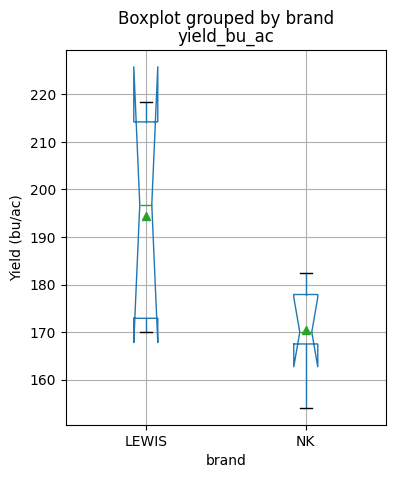

In [69]:
df.boxplot(figsize=(4,5), column='yield_bu_ac', by='brand', 
           notch=True, showmeans=True, ylabel='Yield (bu/ac)');

# Analysis of Variance

The goal of analysis of variance (ANOVA) is to assess whether there are statistically significant differences between the means of three or more groups. It helps to determine whether any observed differences in the group means are likely to be genuine or simply due to random variation. 

A **one-way ANOVA** is used to analyze the effect of a single categorical factor on a continuous variable.

A **two-way ANOVA** is used to assess the influence of two categorical factors simultaneously on a continuous variable. It allows for examining both main effects of each factor as well as their interaction effect.

In this exercise we will use a dataset of corn yield for different treatments of nitrogen fertilizer on multiple US states. The dataset is a subset of the study published by Tremblay et al., 2012 (see references for more details) and it was obtained from (http://www.nue.okstate.edu/).


In [71]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison


In [72]:
# Load data
df = pd.read_csv("../datasets/corn_nue_multiple_locs.csv")
df.head()


,Year,State,Site,Textural_class,Replications,Treatments,N_Planting_kg_ha,N_Sidedress_kg_ha,N_Total_kg_ha,Yield_T_ha
0,2006,Illinois,Pad,Silt loam,1,1,0,0,0,3.26
1,2006,Illinois,Pad,Silt loam,1,3,36,0,36,4.15
2,2006,Illinois,Pad,Silt loam,1,5,36,54,90,8.64
3,2006,Illinois,Pad,Silt loam,1,7,36,107,143,10.52
4,2006,Illinois,Pad,Silt loam,1,9,36,161,197,11.47


In [73]:
# Print some useful properties of the dataset
print(df['Site'].unique())        # Locations
print(df['Treatments'].unique())   # Treatments
print(df['Replications'].unique()) # Replications
print(df.shape)



['Pad' 'Dixon' 'Manhattan' 'Copeland' 'Diederick']
[1 3 5 7 9]
[1 2 3 4]
(120, 10)


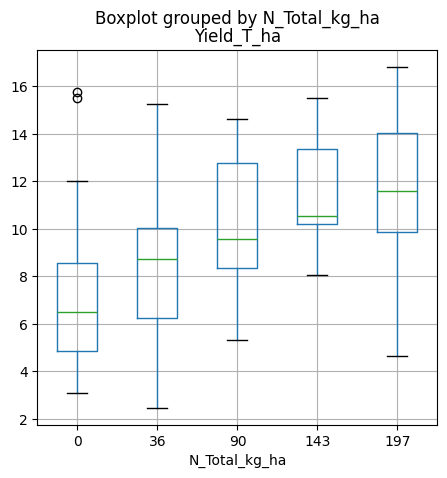

In [74]:
# Examine yield data using boxplots for all locations combined
df.boxplot(figsize=(5,5), column='Yield_T_ha', by='N_Total_kg_ha')
plt.show()


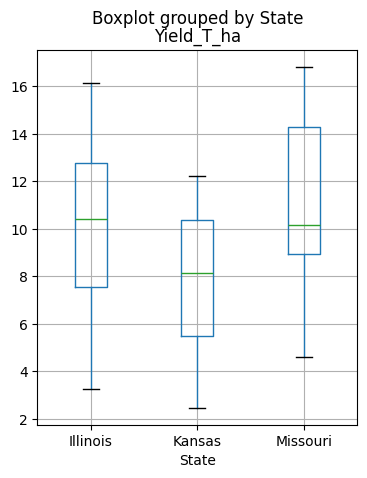

In [75]:
# Examine yield by state
df.boxplot(figsize=(4,5), column='Yield_T_ha', by='State')
plt.show()


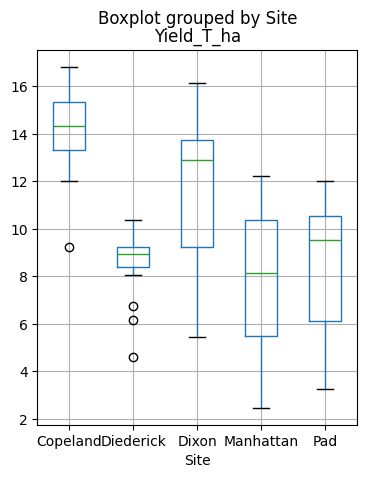

In [76]:
# Examine yield by site
df.boxplot(figsize=(4,5), column='Yield_T_ha', by='Site')
plt.show()


## ANOVA assumptions

1. Samples drawn from a population are normally distributed. **Test**: Shapiro-Wilk

2. Samples drawn from all populations have (approximately) the same variance. This property is called homoscedasticity or homogeneity of variances." **Tests**: Bartlett's and Levene's tests.

3. Samples are independent of each other. Test: No test. Here we rely on the nature of the variable being observed and the experimental design.


In [77]:
# Test the assumption of normality
# Shapiro-WIlk's null hypothesis: Data was obtained from a normal distribution
stats.shapiro(df['Yield_T_ha'])


ShapiroResult(statistic=0.9829135537147522, pvalue=0.1326330304145813)

In [78]:
# Test for homogeneity of variance
# Bartlett's null hypothesis: All the groups have equal variance

D = {}
for tmt in df['Treatments'].unique():
    idx_tmt = df['Treatments'] == tmt
    D[tmt] = df.loc[idx_tmt, 'Yield_T_ha'].values
    
#print(D)
stats.bartlett(D[1], D[3], D[5], D[7], D[9])


BartlettResult(statistic=6.054092711026625, pvalue=0.19514485256182393)

## One-way ANOVA

Here we will compare an independent variable with a single predictor. The predictor `N_Total_kg_ha` will be used as a categorical varaible. Alternatively we could use the `Treatments` column, but it is easier to read the table if we present the values using the actual treatment values, so that we quickly devise which Nitrogen rates show statistical differences.

Below we will explore the one-way ANOVA using both SciPy (simpler code) and Statsmodels (more complete output)


### Using SciPy module

In [82]:
# One-way test
stats.f_oneway(D[1], D[3], D[5], D[7], D[9])


F_onewayResult(statistic=11.431258827879908, pvalue=7.582810948341893e-08)

In [83]:
# Tukey test
print(stats.tukey_hsd(D[1], D[3], D[5], D[7], D[9]))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.317     0.519    -3.642     1.007
 (0 - 2)     -3.036     0.004    -5.361    -0.711
 (0 - 3)     -4.310     0.000    -6.634    -1.985
 (0 - 4)     -4.745     0.000    -7.070    -2.421
 (1 - 0)      1.317     0.519    -1.007     3.642
 (1 - 2)     -1.718     0.250    -4.043     0.607
 (1 - 3)     -2.992     0.005    -5.317    -0.667
 (1 - 4)     -3.428     0.001    -5.753    -1.103
 (2 - 0)      3.036     0.004     0.711     5.361
 (2 - 1)      1.718     0.250    -0.607     4.043
 (2 - 3)     -1.274     0.553    -3.599     1.051
 (2 - 4)     -1.710     0.255    -4.034     0.615
 (3 - 0)      4.310     0.000     1.985     6.634
 (3 - 1)      2.992     0.005     0.667     5.317
 (3 - 2)      1.274     0.553    -1.051     3.599
 (3 - 4)     -0.436     0.985    -2.761     1.889
 (4 - 0)      4.745     0.000     2.421     7.070
 (4 - 1)      3.428     0.001   

### Using Statsmodels module

In [84]:
# Anova table with statsmodels
formula = 'Yield_T_ha ~ C(N_Total_kg_ha)'
anova_lm(ols(formula, data=df).fit())



,df,sum_sq,mean_sq,F,PR(>F)
C(N_Total_kg_ha),4.0,386.085542,96.521385,11.431259,7.582811e-08
Residual,115.0,971.018108,8.443636,NaN,NaN


The ANOVA table shows the there is significant differences between treatments. The catch is that we don't know which groups are different. The ANOVA table only tells us that at least one  group has a mean value that is substantially (read *significantly*) different from the rest.

The **F** is the F-statistic to test the null hypothesis that the corresponding coefficient is zero. The goal is to compare the mean variability within groups to the mean variability between groups. The F-statistic is just the ratio of the two (96.5/8.44=11.4). 96.52 is the variability between groups and 8.44 is the variability within the groups.


The **pValue** of the F-statistic indicates whether a factor is not significant at the 5% significance level given the other terms in the model.

A mean multicomparison test can help us identify which treatments show signifcant differences.


In [85]:
# Multicomparison test
groups = MultiComparison(df["Yield_T_ha"],df['N_Total_kg_ha']).tukeyhsd(alpha=0.05)
print(groups)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0     36   1.3175 0.5192 -1.0073 3.6423  False
     0     90   3.0358  0.004   0.711 5.3607   True
     0    143   4.3096    0.0  1.9847 6.6344   True
     0    197   4.7454    0.0  2.4206 7.0703   True
    36     90   1.7183 0.2499 -0.6065 4.0432  False
    36    143   2.9921 0.0047  0.6672 5.3169   True
    36    197   3.4279 0.0008  1.1031 5.7528   True
    90    143   1.2738 0.5527 -1.0511 3.5986  False
    90    197   1.7096 0.2547 -0.6153 4.0344  False
   143    197   0.4358 0.9852  -1.889 2.7607  False
---------------------------------------------------


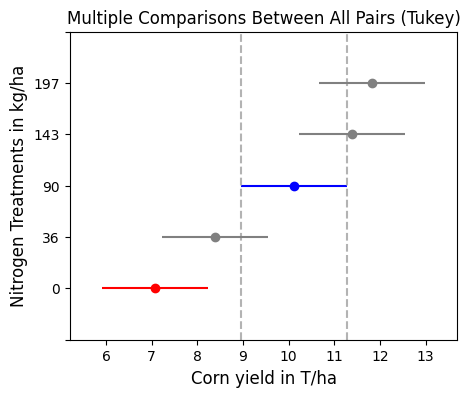

In [86]:
# Visualize significantly different groups relative to a specific group
groups.plot_simultaneous(figsize=(5,4), comparison_name=90)
plt.xlabel('Corn yield in T/ha', size=12)
plt.ylabel('Nitrogen Treatments in kg/ha', size=12)
plt.show()


## Two-way ANOVA

In this case we will add two predictors variables, soil textural class and total nitrogen applied. In many cases researchers add `Location` as a proxy for local environmental conditions (including soil) and `Year` as a proxy for the particular weather conditions during each growing season. In this case we have soil textural class available, so we will make use of that first, since it will give our results broader applications that, in principle, can be related to soil types elsewhere.


In [87]:
# Two predictors
formula = 'Yield_T_ha ~ C(N_Total_kg_ha) + C(Textural_class)'
anova_lm(ols(formula, data=df).fit())


,df,sum_sq,mean_sq,F,PR(>F)
C(N_Total_kg_ha),4.0,386.085542,96.521385,11.750059,5.022955e-08
C(Textural_class),1.0,34.560000,34.560000,4.207172,4.254546e-02
Residual,114.0,936.458108,8.214545,NaN,NaN


Soil textual class was barely significant considering all locations and years at the the 0.05 level.

In [88]:
# Two predictors with interaction
formula = 'Yield_T_ha ~ C(N_Total_kg_ha) * C(Textural_class)'
anova_lm(ols(formula, data=df).fit())


,df,sum_sq,mean_sq,F,PR(>F)
C(N_Total_kg_ha),4.0,386.085542,96.521385,12.530231,1.960683e-08
C(Textural_class),1.0,34.560000,34.560000,4.486516,3.641510e-02
C(N_Total_kg_ha):C(Textural_class),4.0,89.119178,22.279795,2.892322,2.547188e-02
Residual,110.0,847.338930,7.703081,NaN,NaN


The interaction of nitrogen rate and textural class also resulted statistically significant at the 0.05 level.

In [89]:
# Classical ANOVA with Treatment, Location, and Year interactions
formula = 'Yield_T_ha ~ C(N_Total_kg_ha) * State * C(Year)'
anova_lm(ols(formula, data=df).fit())


,df,sum_sq,mean_sq,F,PR(>F)
C(N_Total_kg_ha),4.0,386.085542,96.521385,20.522835,3.270251e-12
State,2.0,234.432785,117.216393,24.923106,1.989675e-09
C(Year),2.0,112.504702,56.252351,11.960642,2.328310e-05
C(N_Total_kg_ha):State,8.0,140.688973,17.586122,3.739245,7.649526e-04
C(N_Total_kg_ha):C(Year),8.0,36.595110,4.574389,0.972628,4.621589e-01
State:C(Year),4.0,3.745613,0.936403,0.199103,9.382617e-01
C(N_Total_kg_ha):State:C(Year),16.0,14.832950,0.927059,0.197116,9.996634e-01
Residual,95.0,446.796537,4.703121,NaN,NaN


In a multi-treatment, multi-year, and multi-state study, it is not surprising that treatment, site, and year resulted highly significant (P<0.01).

Note that the interactions `N_Total_kg_ha:Year`, `State:Year`, and `N_Total_kg_ha:State:Year` were not significant at the P<0.05 level.

## References

Patrignani, A., & Ochsner, T. E. (2015). Canopeo: A powerful new tool for measuring fractional green canopy cover. Agronomy journal, 107(6), 2312-2320.

Tremblay, N.,  Y.M. Bouroubi,  C. Bélec,  R.W. Mullen,  N.R. Kitchen,  W.E. Thomason,  S. Ebelhar,  D.B. Mengel,  W.R. Raun,  D.D. Francis,  E.D. Vories, and I. Ortiz-Monasterio. 2012. Corn response to nitrogen is influenced by soil texture and weather. Agron. J. 104:1658–1671. doi:10.2134/agronj2012.018.
